In [16]:
import os
import pandas as pd
import numpy as np
import nltk

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
data=open("dataset3.txt","r")

In [12]:
da=data.read()

# Text Preprocessing

In [14]:
all_data=[]
for i in da.split("\n"):
    all_data.append(i)

In [18]:
from nltk.corpus import stopwords

In [22]:
stop=stopwords.words("english")

# Removing stopwords and convert into lower

In [74]:
stoprev_sen=[]
for sentence in all_data:
    real_sen=""
    for word in sentence.split(" "):
        if word not in stop:
            real_sen=real_sen+" "+word.lower()
    stoprev_sen.append(real_sen)

# Removing special character

In [32]:
import re

In [50]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)


In [75]:
pun_rev=[]
for i in stoprev_sen:
    i=re.sub('[!|@|#|.|?]',"",i)
    i=re.sub('[\\|🇺🇸|""|...]',"",i)
    i=re.sub('[^A-Za-z]'," ",i)
    i=emoji_pattern.sub(r'', i)
    pun_rev.append(i)

In [76]:
pun_rev

[' satellite commissioned facebook exploded spacex rocket cape canaveral incident',
 ' spacex explosion destroys facebook satellite   wsj   this good thing',
 ' how insure satellites   rockets laurent lemaire  ceo elseco one insurers watch ',
 ' musk offers mars vision reusable rockets           fares spacex travel',
 ' ensuring arts   culture reach mars we right brained space explorers spacex',
 ' idk      million fb satellite help africa secure triad china holdings',
 ' spacex runs down all rocket explosion leads  sabotage weekly best socaltech',
 ' spacex falcon   explosion sabotage unlikely  but snipers here s who related articles ',
 ' shotwell says spacex  homing in  cause falcon   pad',
 ' spacex s president talks falcon   investigation  reusability broadband satellite constellation ',
 ' shotwell says spacex homing in cause falcon   pad explosion space',
 ' shotwell says still working constellation about       satellites provide broadband internet ',
 ' shotwell says spacex  ho

# TfIdfVectorizer

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [80]:
tf=TfidfVectorizer(min_df=5)
vec_data=tf.fit_transform(pun_rev)

In [84]:
vec_data.shape

(1532, 496)

In [94]:
from sklearn.cluster import KMeans
cluster = [] 
for i in range(1,30): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(vec_data) 
    cluster.append(kmeans.inertia_)

In [89]:
import matplotlib.pyplot as plt

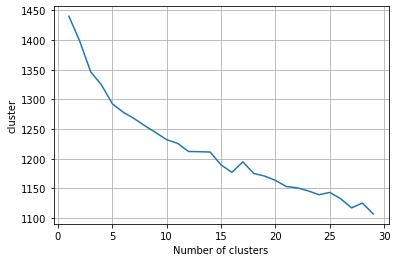

In [219]:
plt.plot(range(1, 30), cluster)
plt.xlabel('Number of clusters')
plt.ylabel('cluster') 
plt.grid()
plt.show()

In [175]:
kmeans = KMeans(n_clusters = 10, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(vec_data)

In [176]:
tf_idf_kmeans=y_kmeans

In [108]:
y_kmeans=pd.Series(y_kmeans)

In [110]:
values=y_kmeans.value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

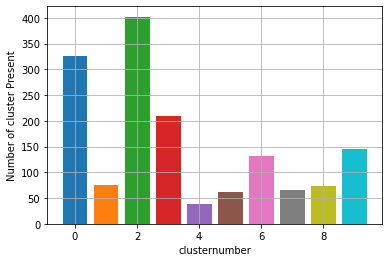

In [126]:
plt.bar(0,values[0])
plt.bar(1,values[1])
plt.bar(2,values[2])
plt.bar(3,values[3])
plt.bar(4,values[4])
plt.bar(5,values[5])
plt.bar(6,values[6])
plt.bar(7,values[7])
plt.bar(8,values[8])
plt.bar(9,values[9])
plt.xlabel("clusternumber")
plt.ylabel("Number of cluster Present")
plt.grid()
plt.show

In [157]:
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
Y=vec_data.todense()

# PCA on Tfidf values

In [147]:
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(Y)

In [149]:
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

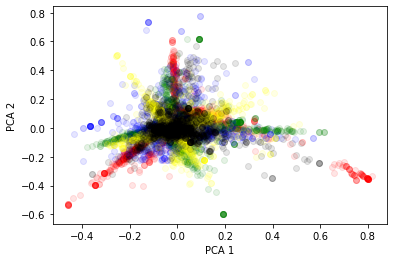

In [156]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='red')
plt.scatter(PCA_components[2], PCA_components[3], alpha=.1, color='green')
plt.scatter(PCA_components[4], PCA_components[5], alpha=.1, color='blue')
plt.scatter(PCA_components[6], PCA_components[7], alpha=.1, color='yellow')
plt.scatter(PCA_components[8], PCA_components[9], alpha=.1, color='black')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Word2Vec implementation

In [162]:
import pickle
from tqdm import tqdm

In [161]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [165]:
avg_w2v_vectors = []; 
for sentence in tqdm(pun_rev): 
    vector = np.zeros(300) 
    cnt_words =0; 
    for word in sentence.split(): 
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|████████████████████████████████████| 1532/1532 [00:00<00:00, 55648.96it/s]

1532
300


In [167]:
word_number=np.array(avg_w2v_vectors)

In [177]:
kmeans = KMeans(n_clusters = 10, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(word_number)

In [178]:
word2vec_kmeans=y_kmeans

In [169]:
y_kmeans=pd.Series(y_kmeans)

In [170]:
values=y_kmeans.value_counts()

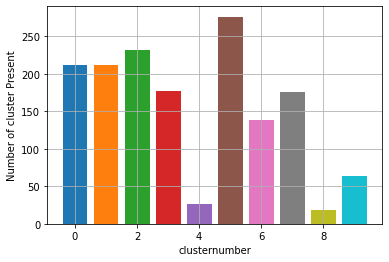

In [171]:
plt.bar(0,values[0])
plt.bar(1,values[1])
plt.bar(2,values[2])
plt.bar(3,values[3])
plt.bar(4,values[4])
plt.bar(5,values[5])
plt.bar(6,values[6])
plt.bar(7,values[7])
plt.bar(8,values[8])
plt.bar(9,values[9])
plt.xlabel("clusternumber")
plt.ylabel("Number of cluster Present")
plt.grid()
plt.show()

# PCA on Word2Vec values

In [172]:
# Create a PCA instance: pca
pca = PCA(n_components=20)
principalComponents = pca.fit_transform(word_number)

In [173]:
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 2')

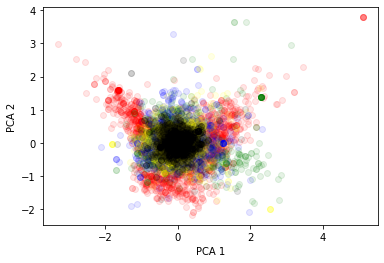

In [174]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='red')
plt.scatter(PCA_components[2], PCA_components[3], alpha=.1, color='green')
plt.scatter(PCA_components[4], PCA_components[5], alpha=.1, color='blue')
plt.scatter(PCA_components[6], PCA_components[7], alpha=.1, color='yellow')
plt.scatter(PCA_components[8], PCA_components[9], alpha=.1, color='black')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Similarity checking

# Word2Vec Model

In [200]:
count=0
values=[]
j=0
for i in word2vec_kmeans:
    if i==1:
        values.append(word_number[j])
    count=count+1
    j=j+1
    

In [202]:
from sklearn.metrics.pairwise import cosine_similarity

In [203]:
values=np.array(values)

In [204]:
values.shape

(211, 300)

In [207]:
similarity=cosine_similarity(np.array(values[0:5]),np.array(values[5:10]))
print(similarity)

[[0.51614877 0.47388836 0.43575224 0.47636274 0.42893184]
 [0.44581763 0.42969138 0.32399641 0.44475567 0.42475499]
 [0.34190917 0.31644335 0.29662032 0.3134228  0.31306306]
 [0.72280091 0.64827769 0.66258251 0.63374481 0.64251564]
 [0.79857978 0.71299765 0.77736113 0.78187861 0.6620604 ]]


# tfIdf Model

In [208]:
count=0
values=[]
j=0
for i in tf_idf_kmeans:
    if i==1:
        values.append(Y[j])
    count=count+1
    j=j+1
    

In [209]:
values=np.array(values)

In [213]:
val=[]
for i in values:
    val.append(i[0])

In [214]:
values=np.array(val)

In [215]:
values.shape

(76, 496)

In [218]:
similarity=cosine_similarity(np.array(values[0:5]),np.array(values[5:10]))
print(similarity)

[[0.13090557 0.1334576  0.2607324  0.20188283 0.19626118]
 [0.26426803 0.26941999 0.38238043 0.36535638 0.35518263]
 [0.06817322 0.3425478  0.09864267 0.20437002 0.19867912]
 [0.58399239 0.18403558 0.17915461 0.17117842 0.16641177]
 [0.96749012 0.10380575 0.21393491 0.20441026 0.19871824]]


# Observations

Here i do the cosine similarity on cluster value 1

        1.cosine similarity value of word2vec model is higher than the tfidf model
        
        2.as from the above result we can say that word2vec model is better than tfidf model as the similarity matrix is high